## SEIRS Model

**Problem description**:

The SEIRS model describes the spread of a disease in a population fixed to $N$ individuals over time $t$. Furthermore, the model divides the population into four categories, called "S", "E", "I", and "R". The extra "S" at the end usually means we include the loss of immunity.
- "S" consists of individuals who are susceptible to the disease being modeled.
- "E" consists of individuals who are exposed to the disease. Diseases (like COVID-19) often have an incubation period or a latency period and this category accommodates it. (The SIR model does not have this category.)
- "I" consists of individuals infected with the disease and are capable of infecting others.
- "R" consists of individuals who can be removed from the system, e.g., because they have gained immunity to the disease, or because they have succumbed to the disease.

The SEIR model, like many other epidemiological models depends on particular parameters, which are the following :
 - $\beta>0$ The rate of contraction of the disease (transmission parameter)
 - $ \sigma >0$ The incubation rate i.e. the rate at which exposed hosts become infected
 - $\gamma>0$ : The mean recovery rate
 - $\xi>0$ : The loss of immunity rate. 
 
Individual $S$ becomes infected after positive contact with an $I$ individual. However, he develops immunity to the disease : he leaves $I$ category at a $\gamma$ cure rate. However with a rate $\xi$, they may lose immunity to the disease and rejoin the susceptible population $S$.

**Model Assumptions**

- Model is deterministic
- On average, an individual $S$ in the population encounters $\beta$ individuals per unit time.
- The rate of infected individuals leaving category $I$ is $\gamma I$ per unit time (once an individual has been infected, he develops immunity to the disease).
- The population size $N=S+E+I+R$ is constant.
- Note constant average number of contacts $\beta$ is a strong and constraining assumption : it cannot be applied to all diseases.

This is the system of equations of the model :

The total population $N$ in the system (the sum of individuals in all categories) is likely to be quite large. Instead of working with such large numbers, let us divide each side of each equation by $\mathbf{N}$ and work instead with the proportions
$$
s=\frac{S}{N}, \quad e=\frac{E}{N}, \quad i=\frac{I}{N}, \quad r=\frac{R}{N} .
$$
The equivalent ODE system to be solved for the unknown functions $s(t), e(t), i(t)$, and $r(t)$, has now become
$$
\begin{aligned}
& \frac{d s}{d t}=-\beta i s  + \xi r\\
& \frac{d e}{d t}=\beta i s-\sigma e \\
& \frac{d i}{d t}=\sigma e-\gamma i \\
& \frac{d r}{d t}=\gamma i - \xi r
\end{aligned}
$$
When supplemented with some initial conditions, say
$$
s(0)=0.99, \quad e(0)=0.01, \quad i(0)=0, \quad r(0)=0
$$
This is the formulation of the Initial Value Probelm we wish to solve. Note that the above initial conditions correspond to a starting scenario where just $1 \%$ of the population is exposed.


In [18]:
gamma = 1/14.
r0 = 3.
beta = gamma * r0
sigma = 1/7.
xi = 1/365.

true_lam = np.array([beta, sigma, gamma, xi])
true_lam

array([0.21428571, 0.14285714, 0.07142857, 0.00273973])

on 2: /opt/conda/envs/pyDCI/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
        warnings.warn(warning_msg, ODEintWarning)


Solving model sample set: |████████████████████| 1000/1000 [100%] in 4.3s (235.1


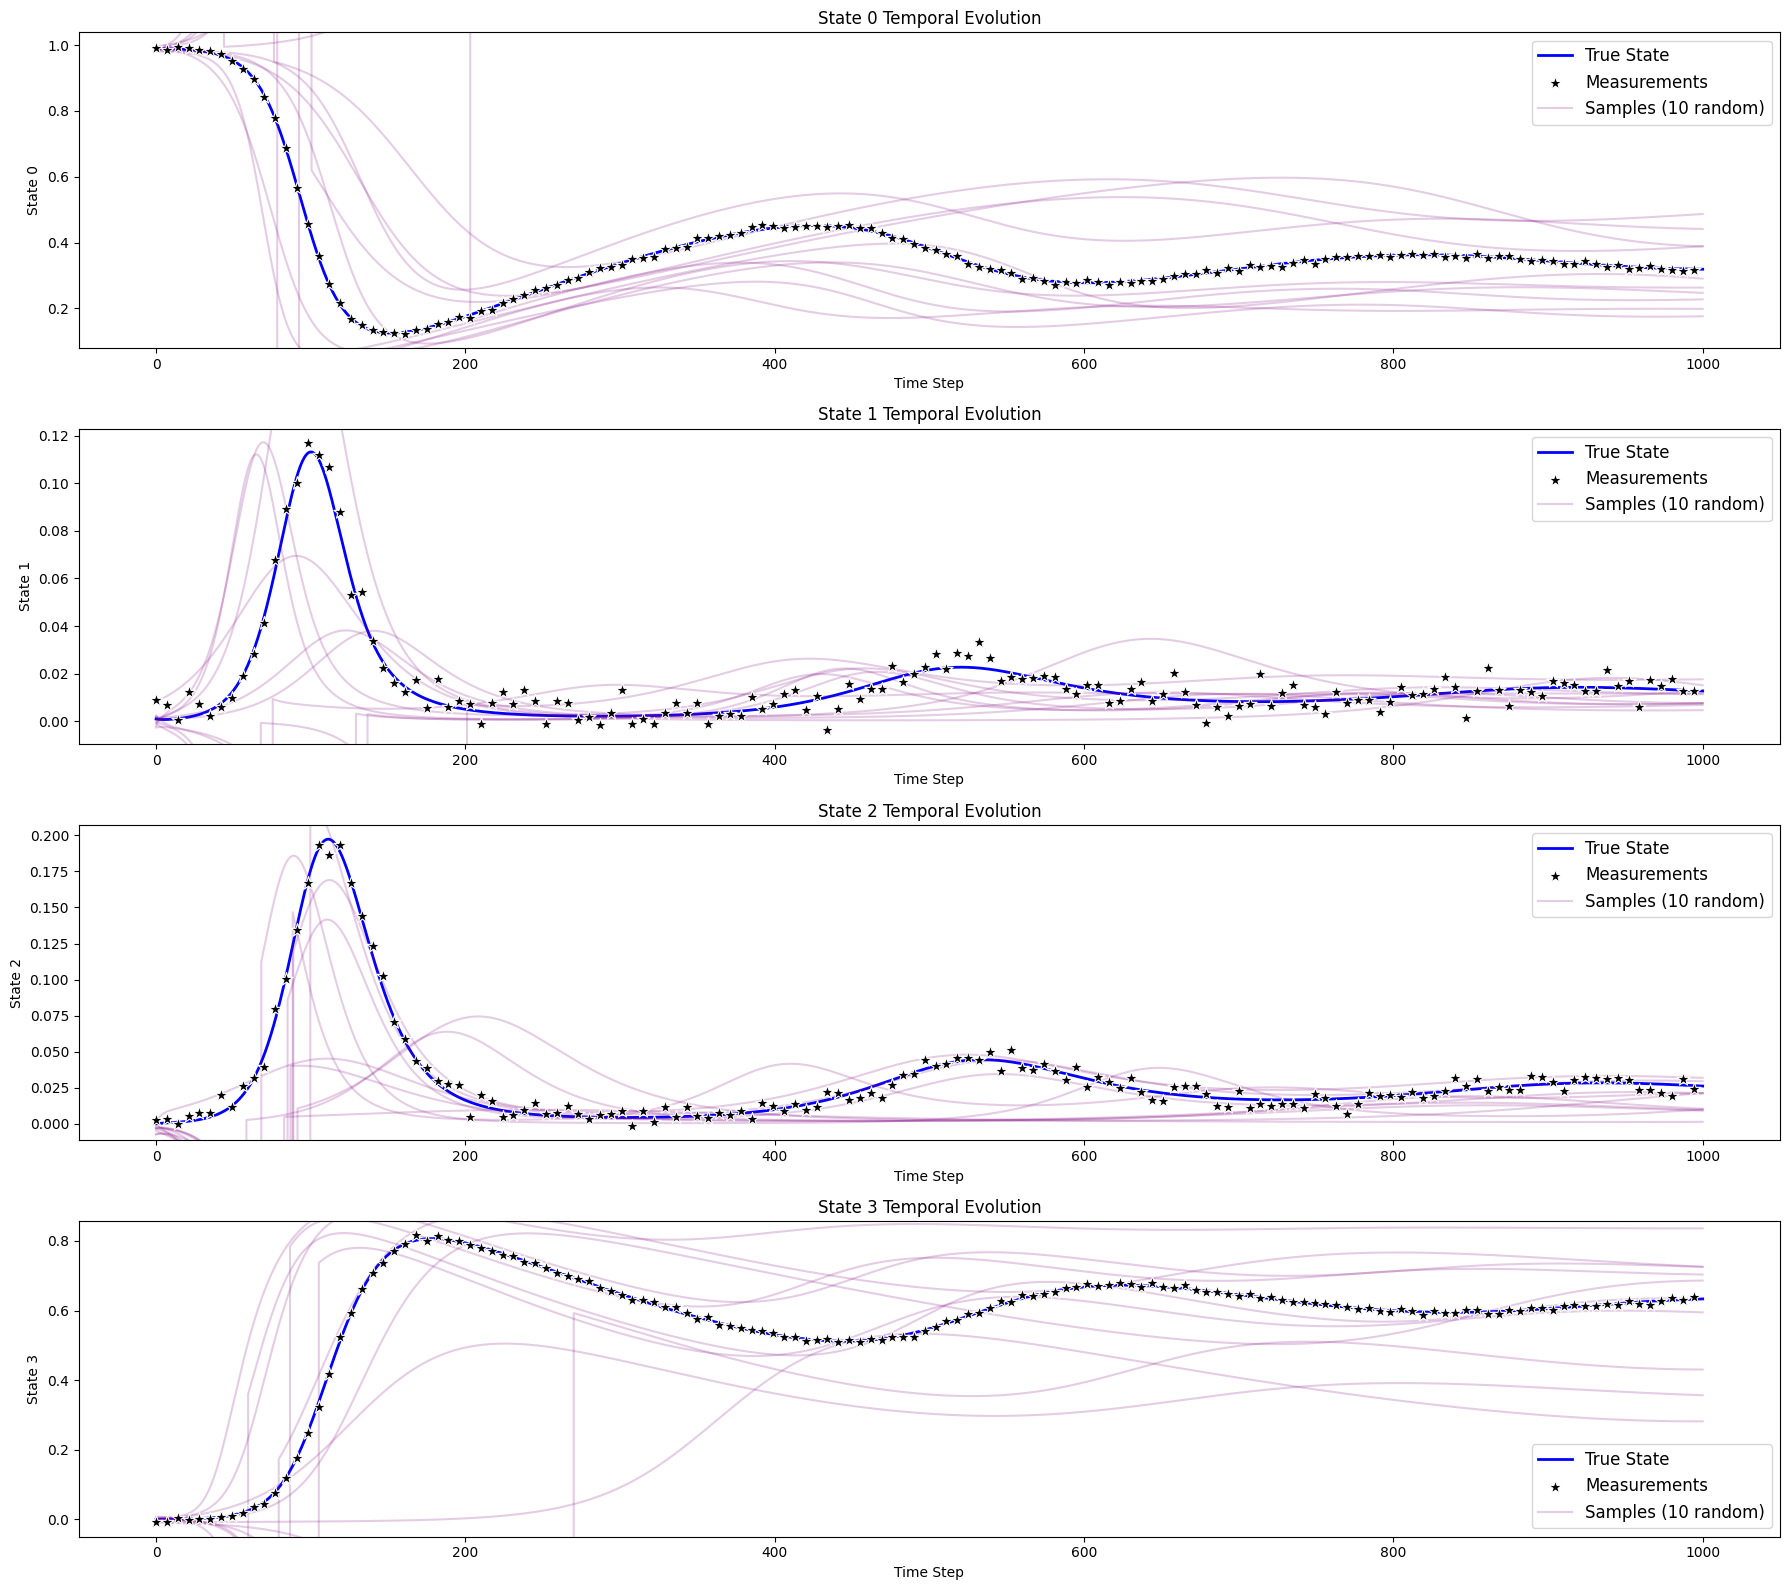

In [26]:
import numpy as np
from pydci.examples import seirs
import importlib
importlib.reload(seirs)

sr = seirs.SEIRSModel()
samples = sr.get_uniform_initial_samples(num_samples=1000, scale=0.5)
res = sr.forward_solve(1000, samples=samples)
sr.plot_states()

# PCA Problem



on 138: /opt/conda/envs/pyDCI/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
          warnings.warn(warning_msg, ODEintWarning)


Solving model sample set: |████████████████████| 1000/1000 [100%] in 0.6s (1633.


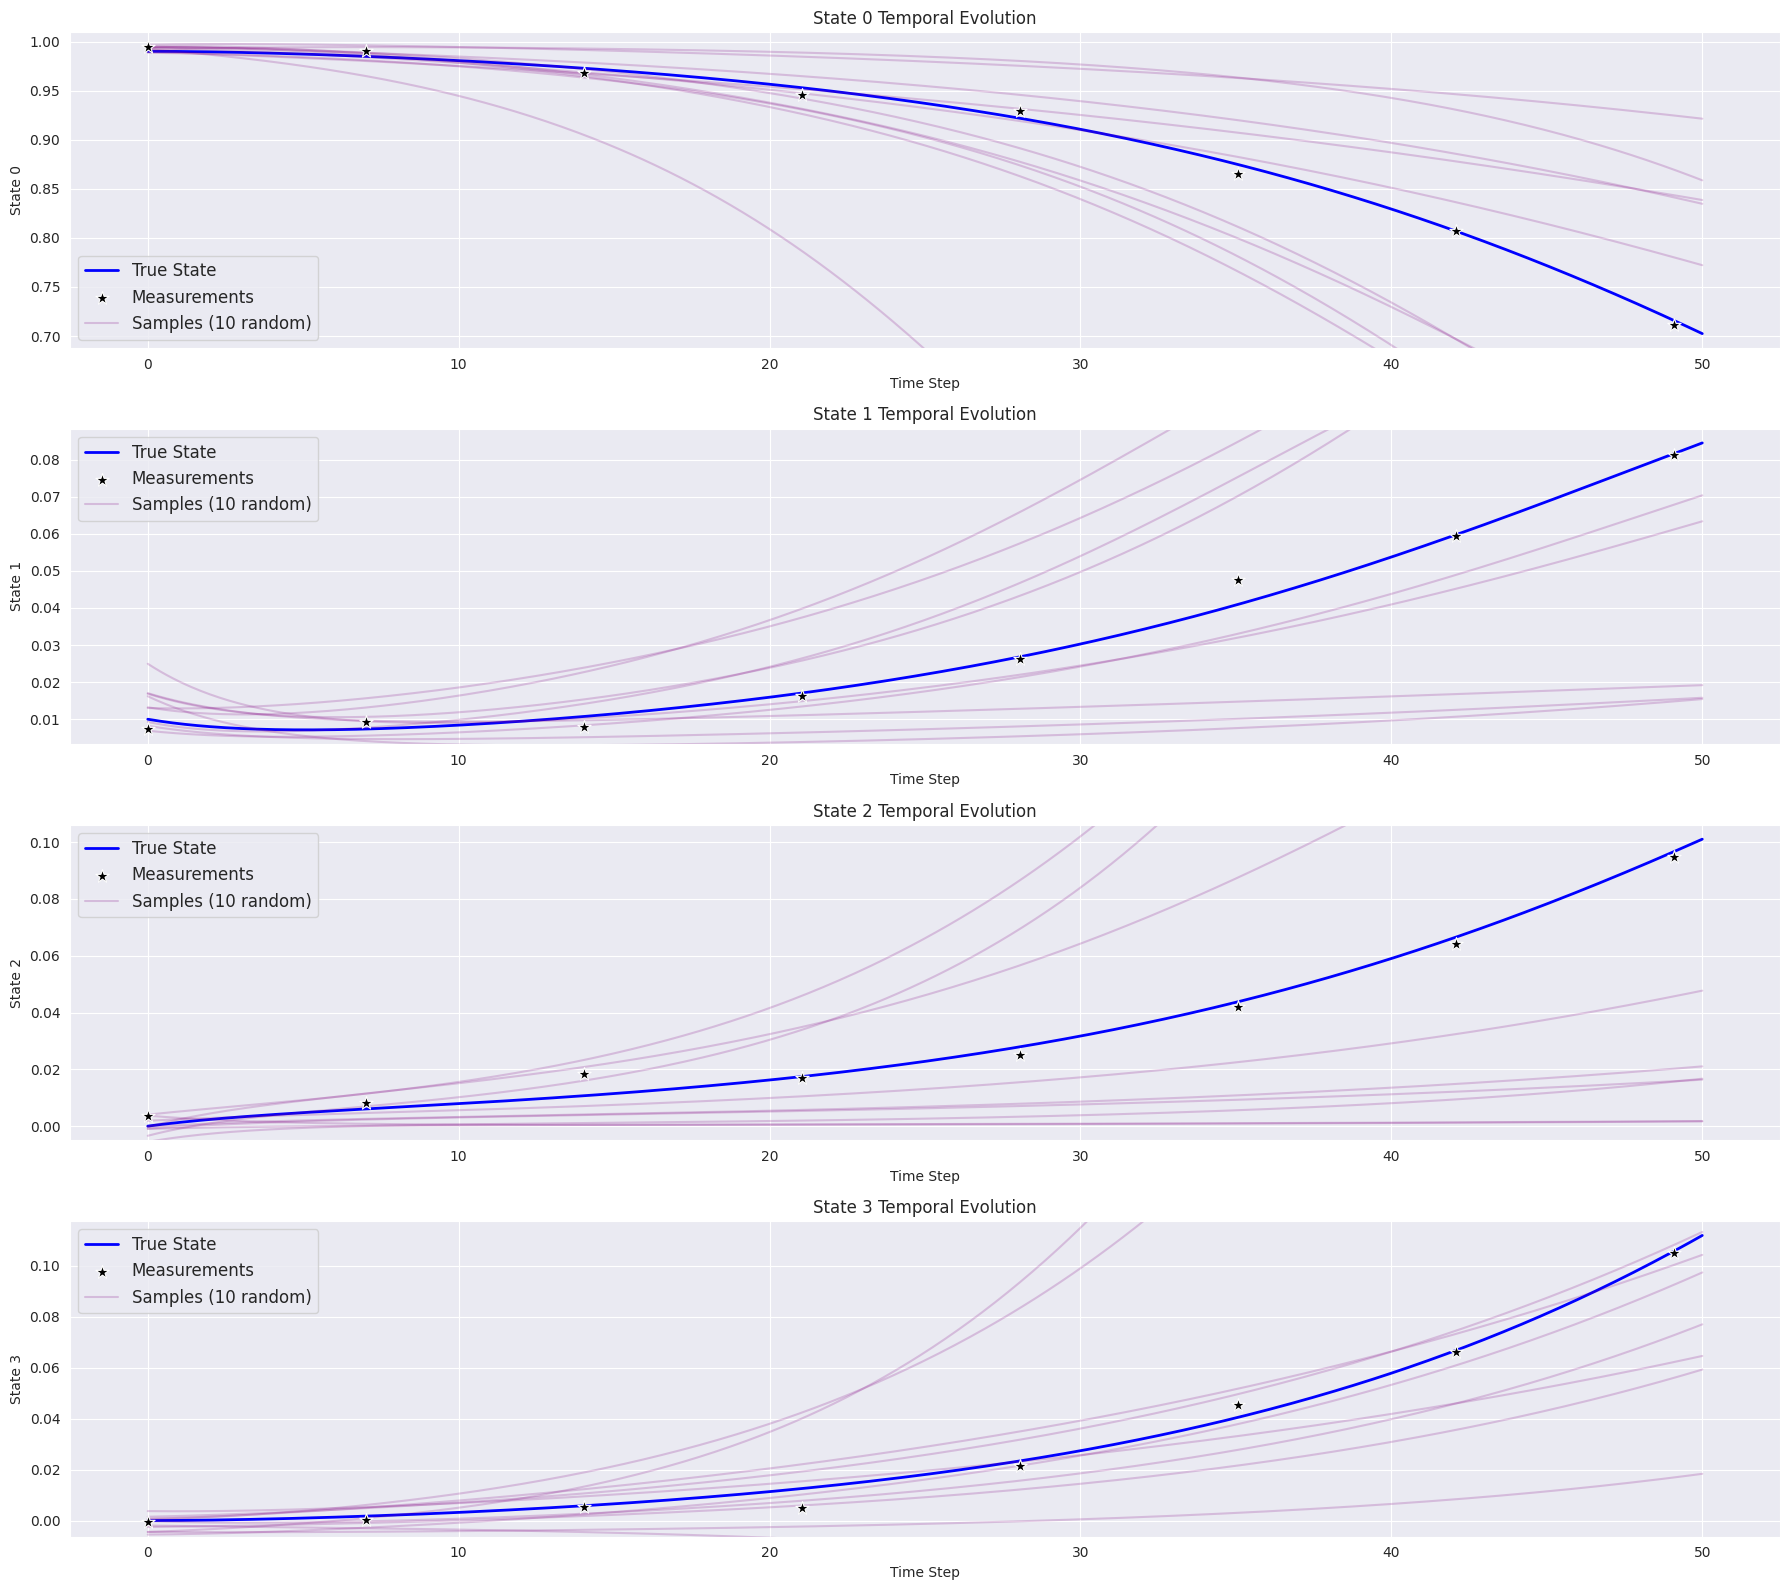

In [61]:
import numpy as np
from pydci.examples import seirs
import importlib
importlib.reload(seirs)

sr = seirs.SEIRSModel(sample_ts=7)
samples = sr.get_uniform_initial_samples(num_samples=1000, scale=0.5)
res = sr.forward_solve(50, samples=samples)
sr.plot_states()

In [52]:
res['samples']

,lam_0,lam_1,lam_2,lam_3,q_lam_0,q_lam_1,q_lam_2,q_lam_3,q_lam_4,q_lam_5,...,q_lam_190,q_lam_191,q_lam_192,q_lam_193,q_lam_194,q_lam_195,q_lam_196,q_lam_197,q_lam_198,q_lam_199
0,0.271685,0.158996,0.084805,0.002588,0.990448,0.011951,0.007214,0.002120,0.988342,0.012148,...,0.204998,0.315249,0.339053,0.132097,0.208597,0.331986,0.321057,0.130085,0.211629,0.348962
1,0.250176,0.160445,0.078756,0.001946,0.994838,0.006881,-0.000510,0.000406,0.994834,0.005866,...,0.096228,0.099814,0.704677,0.087373,0.102127,0.107438,0.686560,0.091341,0.108196,0.115518
2,0.168423,0.096690,0.092190,0.003752,0.987119,0.014437,0.005961,-0.000649,0.986057,0.014115,...,0.034394,0.076162,0.849982,0.042544,0.035254,0.079087,0.845180,0.043482,0.036124,0.082081
3,0.150531,0.195432,0.063552,0.002928,0.987271,0.018767,-0.000840,0.003365,0.987151,0.015555,...,0.090586,0.110696,0.750726,0.047679,0.093920,0.116237,0.740325,0.048966,0.097296,0.121976
4,0.315326,0.077191,0.080394,0.002683,0.988540,0.006995,-0.002799,-0.000250,0.989302,0.005742,...,0.012600,0.011520,0.939385,0.026999,0.013562,0.012541,0.935252,0.029002,0.014593,0.013639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.149540,0.145586,0.086688,0.001703,0.977388,0.022004,0.004818,-0.003090,0.976488,0.019855,...,0.051594,0.113024,0.792463,0.038644,0.052658,0.117355,0.786376,0.039254,0.053720,0.121771
996,0.128230,0.183129,0.045565,0.003782,0.990035,0.007788,-0.001128,0.007498,0.990120,0.006433,...,0.039182,0.036104,0.904353,0.020937,0.041107,0.037796,0.899620,0.021888,0.043113,0.039572
997,0.176223,0.208969,0.052544,0.003608,0.992634,0.007136,-0.000712,-0.011143,0.992596,0.005790,...,0.091135,0.055348,0.779556,0.051552,0.096722,0.060084,0.766189,0.054087,0.102537,0.065102
998,0.247638,0.196312,0.076701,0.002690,0.987849,0.015073,-0.007396,0.001239,0.989278,0.011097,...,0.101108,0.093853,0.710071,0.077190,0.107885,0.101619,0.690999,0.080989,0.114884,0.109893


In [57]:
import pydci.ConsistentBayes as CB

pca_prob = CB.PCAMUDProblem(res['samples'], res['data'], res['std_dev'])
pca_prob.solve(pca_mask=[0,1])
pca_prob.result

,e_r,kl,lam_MUD_0,lam_MUD_1,lam_MUD_2,lam_MUD_3,predict_delta,within_thresh,closest,max_kl,min_kl
nc,,,,,,,,,,,
1,0.99265,0.05892,0.263457,0.172598,0.071557,0.00236,0.00735,True,True,False,True


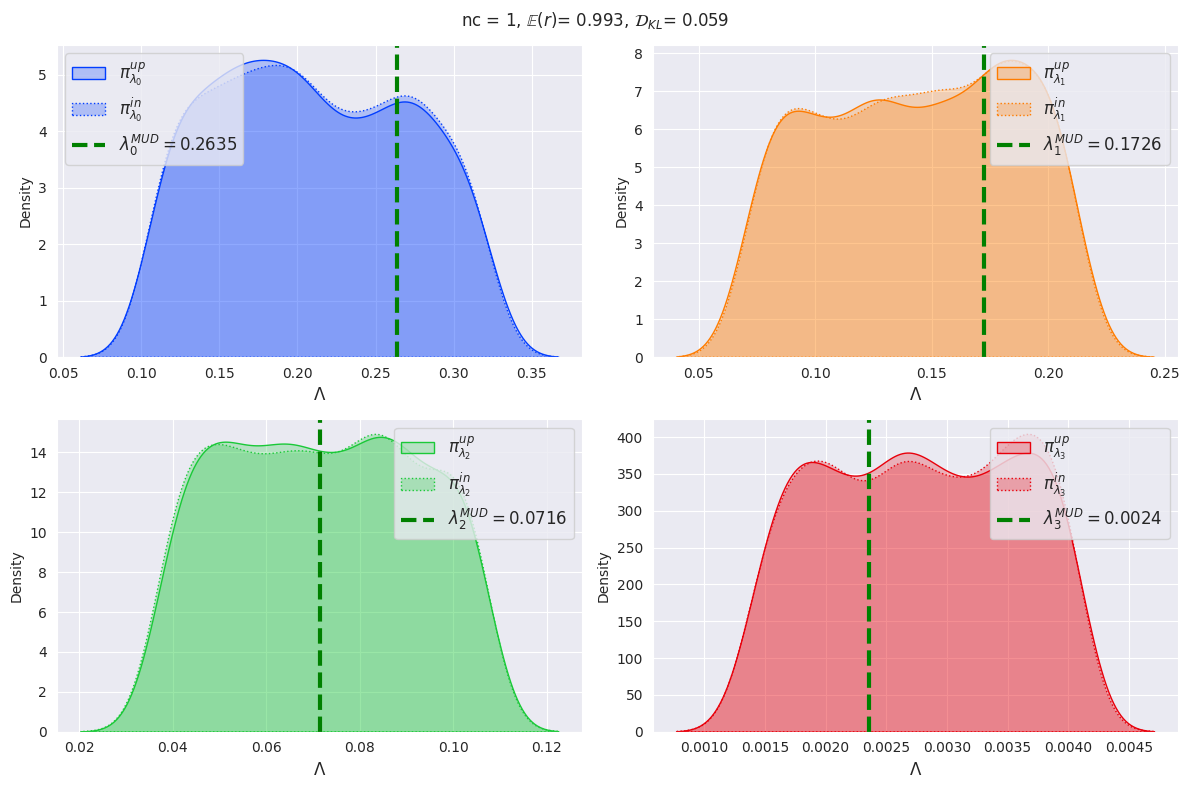

In [59]:
pca_prob.param_density_plots()

In [62]:
import pydci.ConsistentBayes as CB

seq_prob = CB.SequentialProblem(res['samples'], res['data'], res['std_dev'])
seq_prob.solve(num_splits=3)
seq_prob.result

,,,e_r,kl,lam_MUD_0,lam_MUD_1,lam_MUD_2,lam_MUD_3,predict_delta,within_thresh,closest,max_kl,min_kl
split,nc,qoi_comb,,,,,,,,,,,
2,1,0,NaN,2.2579,0.155723,0.179538,0.03748,0.0015,NaN,False,False,False,False


In [63]:
seq_prob.split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  \
split nc qoi_comb                                                        
0     1  0         1.027625  0.850549   0.256048   0.198161   0.090631   
      2  0         1.043466  0.944286   0.276199   0.166307   0.082309   
      3  0         1.043640  1.217683   0.131705   0.171641   0.043242   
      4  0         0.845453  1.518275   0.240327   0.178969   0.082061   
1     1  0         1.107016  1.971492   0.161585   0.170677   0.092554   
      2  0         0.780068  3.064071   0.225554   0.093183   0.062172   
      3  0         0.884093  3.370482   0.297132   0.101553   0.104989   
      4  0         0.379897  3.824570   0.192292   0.131551   0.053802   
2     1  0              NaN  2.257900   0.155723   0.179538   0.037480   
      2  0              NaN  3.298506   0.155723   0.179538   0.037480   
      3  0              NaN  2.766153   0.186938   0.132225   0.053926   
      4  0              NaN  4.901144   0.186938   0.132225   0.053926   

                   lam_MUD_3  predict_delta  within_thresh  closest  max_kl  \
split nc qoi_comb                                                             
0     1  0          0.003530       0.027625           True     True   False   
      2  0          0.001798       0.043466           True    False   False   
      3  0          0.003655       0.043640           True    False   False   
      4  0          0.003838       0.154547           True    False    True   
1     1  0          0.003871       0.107016           True     True   False   
      2  0          0.003694       0.219932           True    False   False   
      3  0          0.004026       0.115907           True    False    True   
      4  0          0.003819       0.620103          False    False   False   
2     1  0          0.001500            NaN          False    False   False   
      2  0          0.001500            NaN          False    False   False   
      3  0          0.002739            NaN          False    False   False   
      4  0          0.002739            NaN          False    False   False   

                   min_kl  
split nc qoi_comb          
0     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False  
1     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False  
2     1  0          False  
      2  0          False  
      3  0          False  
      4  0          False

In [64]:
seq_prob.split_states

,pi_obs_nc=1_qoi=0_split=0,pi_pr_nc=1_qoi=0_split=0,ratio_nc=1_qoi=0_split=0,pi_up_nc=1_qoi=0_split=0,pi_obs_nc=2_qoi=0_split=0,pi_pr_nc=2_qoi=0_split=0,ratio_nc=2_qoi=0_split=0,pi_up_nc=2_qoi=0_split=0,pi_obs_nc=3_qoi=0_split=0,pi_pr_nc=3_qoi=0_split=0,...,ratio_nc=2_qoi=0_split=2,pi_up_nc=2_qoi=0_split=2,pi_obs_nc=3_qoi=0_split=2,pi_pr_nc=3_qoi=0_split=2,ratio_nc=3_qoi=0_split=2,pi_up_nc=3_qoi=0_split=2,pi_obs_nc=4_qoi=0_split=2,pi_pr_nc=4_qoi=0_split=2,ratio_nc=4_qoi=0_split=2,pi_up_nc=4_qoi=0_split=2
0,2.879532e-07,0.031743,0.000009,1.056439,1.148751e-07,0.008565,0.000013,1.561884,2.497531e-09,0.002103,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN
1,1.504946e-01,0.064501,2.333203,285480.101165,9.940235e-03,0.006773,1.467574,179565.696505,1.562976e-06,0.000424,...,0.000000e+00,0.000000e+00,0.000000e+00,1.200255e-20,0.000000e+00,0.000000e+00,0.000000e+00,8.868525e-27,0.000000e+00,0.000000e+00
2,1.312876e-01,0.063669,2.062035,252035.140739,4.700737e-02,0.016320,2.880289,352047.337962,1.874278e-02,0.003360,...,1.061606e-49,1.169828e-54,1.723966e-73,6.097281e-10,2.827435e-64,3.115668e-69,1.994288e-79,6.401466e-11,3.115362e-69,3.432947e-74
3,3.770464e-01,0.072758,5.182197,967301.963422,2.292679e-02,0.006890,3.327482,621103.441048,7.302757e-04,0.001720,...,1.099172e-61,5.712377e-61,2.936491e-83,5.658662e-08,5.189373e-76,2.696908e-75,1.140000e-83,4.483093e-09,2.542887e-75,1.321534e-74
4,8.223439e-03,0.051667,0.159162,23257.789592,3.268490e-03,0.013326,0.245272,35840.773001,1.107040e-03,0.002617,...,0.000000e+00,0.000000e+00,0.000000e+00,1.150727e-241,0.000000e+00,0.000000e+00,0.000000e+00,4.452233e-298,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.584022e-03,0.078364,0.109540,9483.197463,2.375223e-03,0.021153,0.112288,9721.144232,9.464666e-04,0.004737,...,0.000000e+00,0.000000e+00,0.000000e+00,4.301789e-22,0.000000e+00,0.000000e+00,0.000000e+00,2.723406e-27,0.000000e+00,0.000000e+00
996,1.338709e-02,0.053338,0.250985,45829.947538,1.888622e-03,0.010724,0.176110,32157.809782,7.478905e-04,0.002321,...,2.666889e-259,8.272376e-306,1.529928e-272,3.595660e-29,4.254929e-244,1.319829e-290,1.743128e-273,4.359535e-29,3.998426e-245,1.240265e-291
997,3.980740e-01,0.074499,5.343370,831366.460005,7.801232e-02,0.016814,4.639607,721869.102156,3.044046e-02,0.003408,...,2.787499e-03,2.197442e+02,1.273209e-09,6.284627e-05,2.025910e-05,1.597066e+00,4.562807e-10,3.188886e-06,1.430847e-04,1.127965e+01
998,8.670511e-07,0.033180,0.000026,1.943015,2.555401e-08,0.002425,0.000011,0.783587,3.728508e-09,0.000791,...,0.000000e+00,0.000000e+00,0.000000e+00,4.279820e-170,0.000000e+00,0.000000e+00,0.000000e+00,7.067715e-172,0.000000e+00,0.000000e+00
